In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
# yf.pdr_override()
from datetime import datetime

In [2]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']  
end = datetime.now()
start = datetime(end.year- 1, end.month, end.day)
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-08-28,173.690002,173.690002,168.919998,170.800003,170.800003,29045000,AMAZON
2024-08-29,173.220001,174.289993,170.809998,172.119995,172.119995,26407800,AMAZON
2024-08-30,172.779999,178.899994,172.600006,178.500000,178.500000,43429400,AMAZON
2024-09-03,177.550003,178.259995,175.259995,176.250000,176.250000,37817500,AMAZON
2024-09-04,174.479996,175.979996,172.539993,173.330002,173.330002,30309200,AMAZON
2024-09-05,175.000000,179.880005,175.000000,177.889999,177.889999,40170500,AMAZON
2024-09-06,177.240005,178.380005,171.160004,171.389999,171.389999,41466500,AMAZON
2024-09-09,174.529999,175.850006,173.509995,175.399994,175.399994,29037400,AMAZON
2024-09-10,177.490005,180.500000,176.789993,179.550003,179.550003,36233800,AMAZON


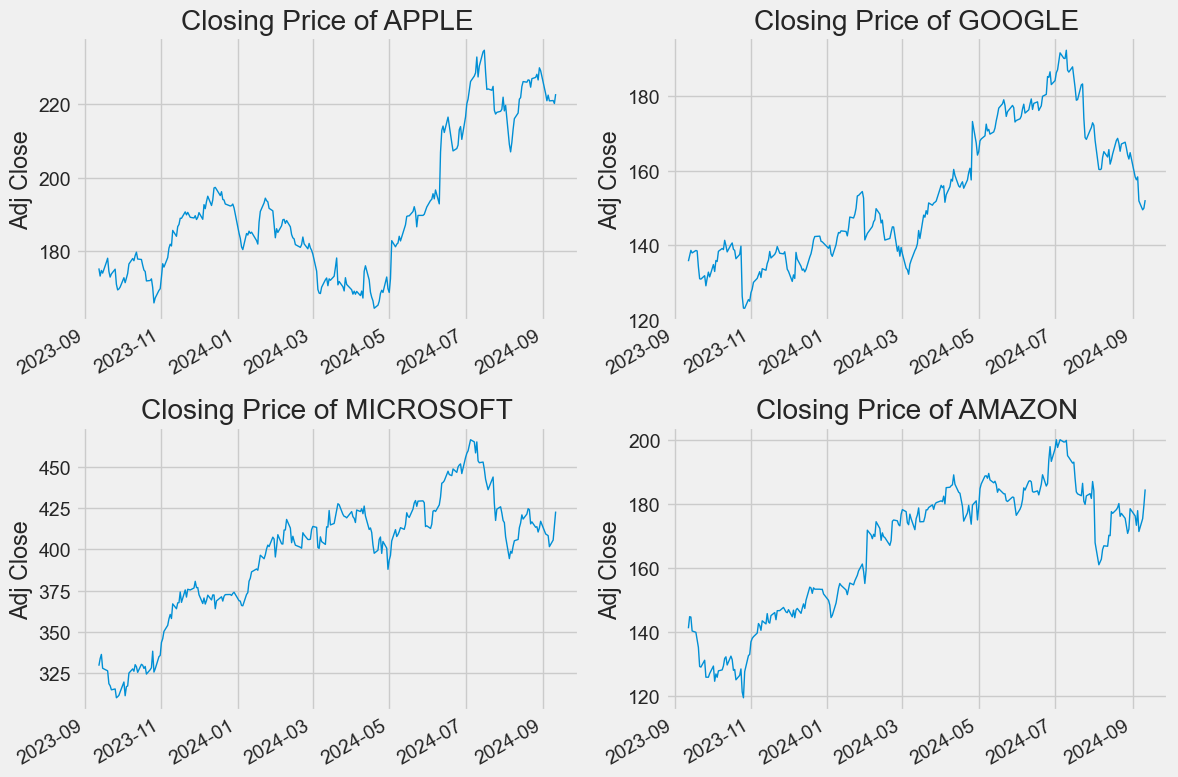

In [4]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(linewidth=1)
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

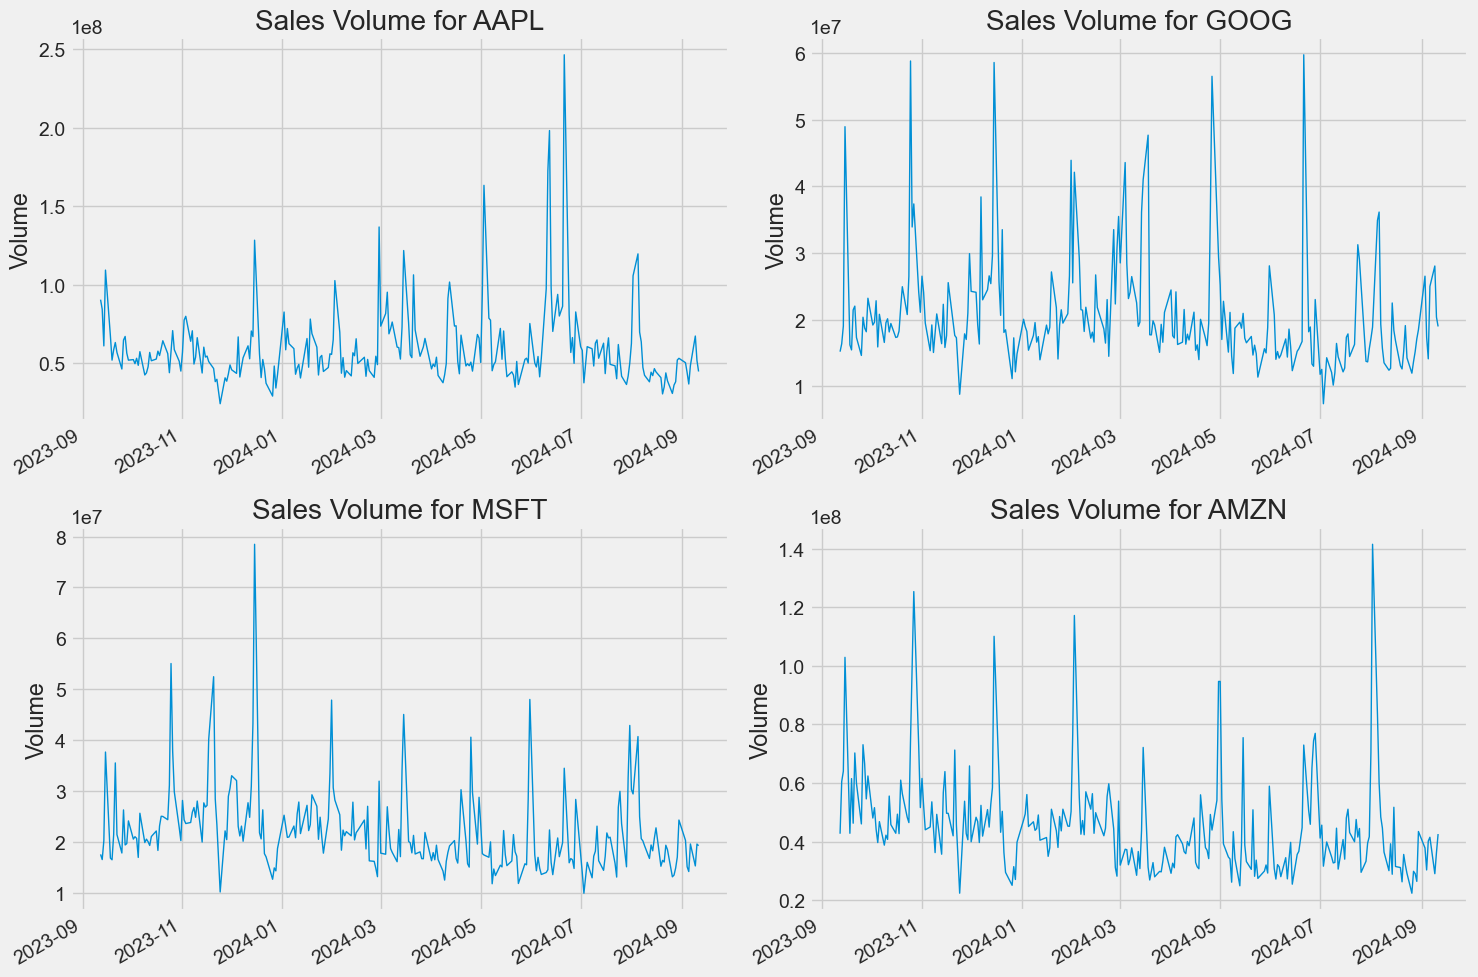

In [5]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(linewidth=1)
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

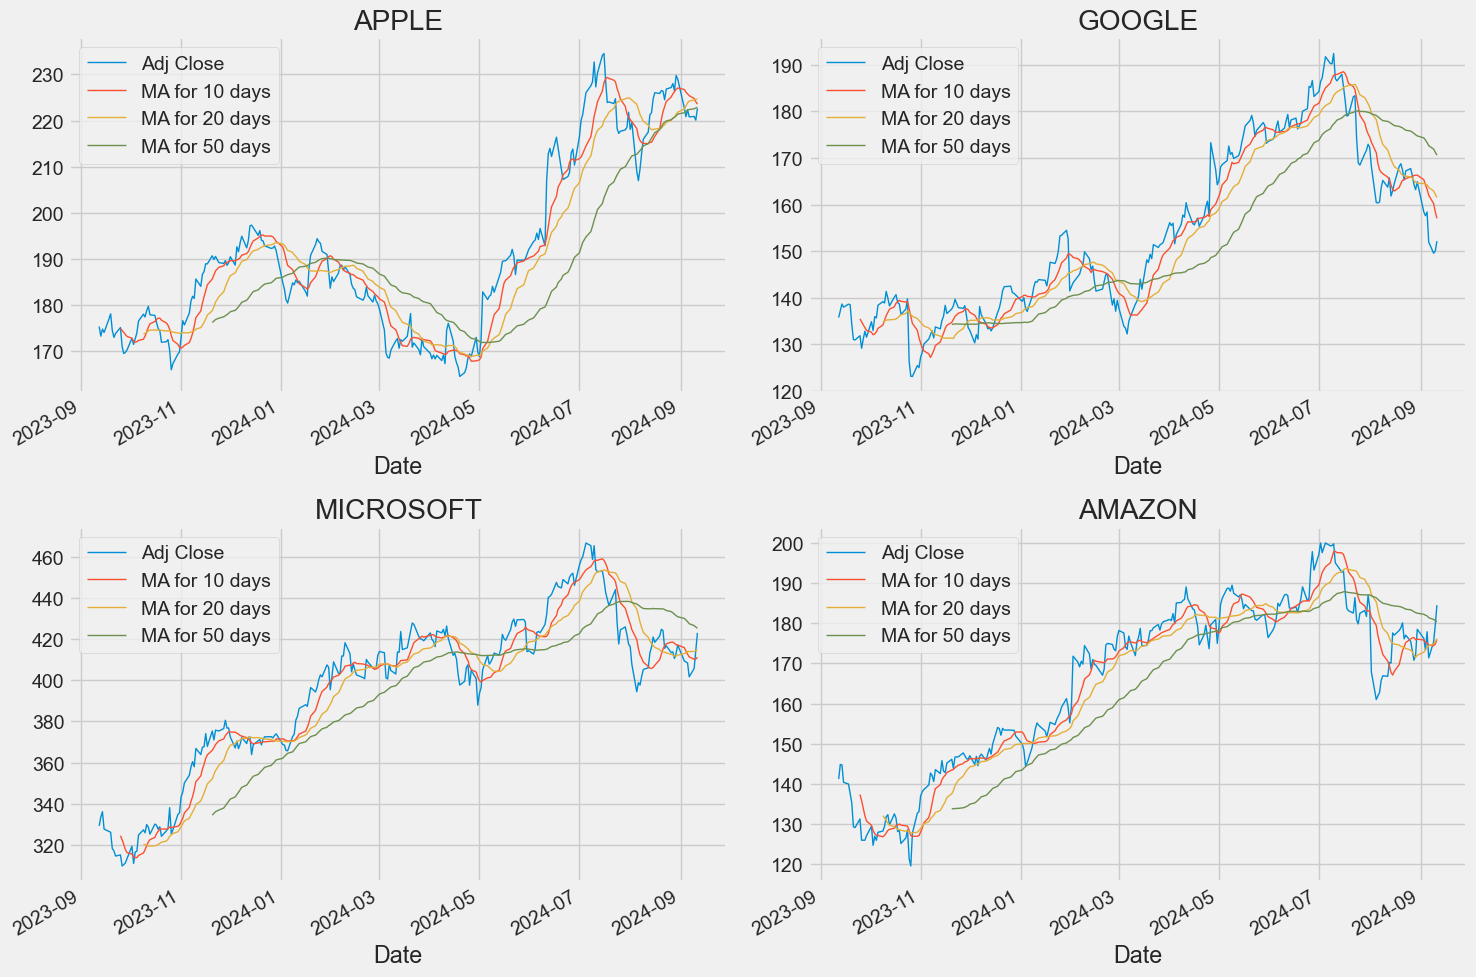

In [6]:
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0],linewidth=1)
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1],linewidth=1)
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0],linewidth=1)
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1],linewidth=1)
axes[1,1].set_title('AMAZON')

fig.tight_layout()

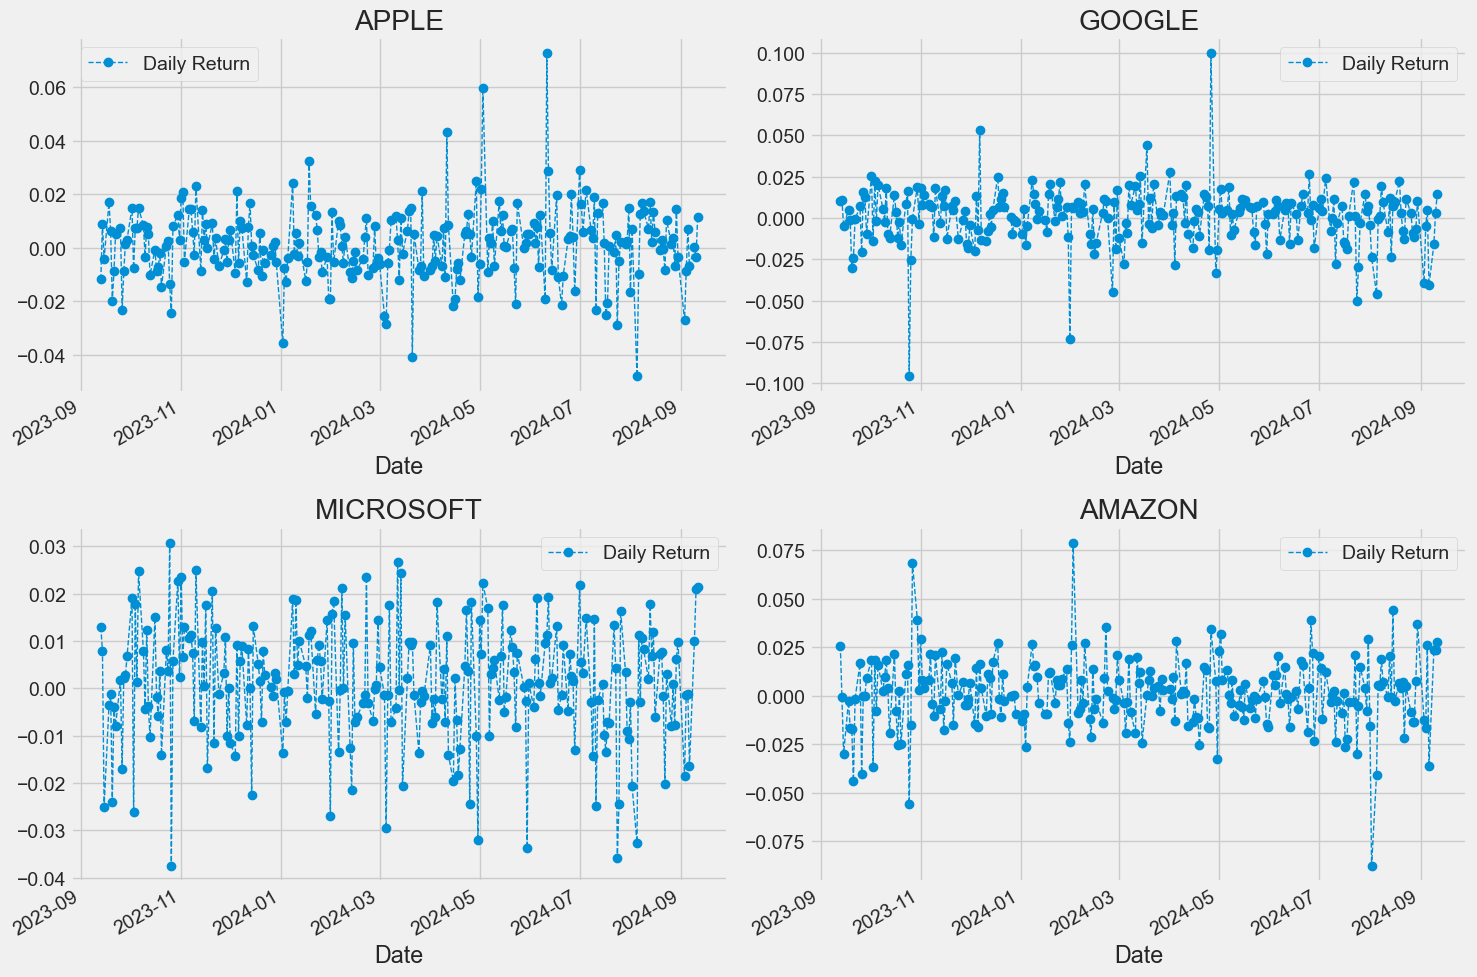

In [7]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o',linewidth=1)
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o',linewidth=1)
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o',linewidth=1)
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o',linewidth=1)
axes[1,1].set_title('AMAZON')

fig.tight_layout()

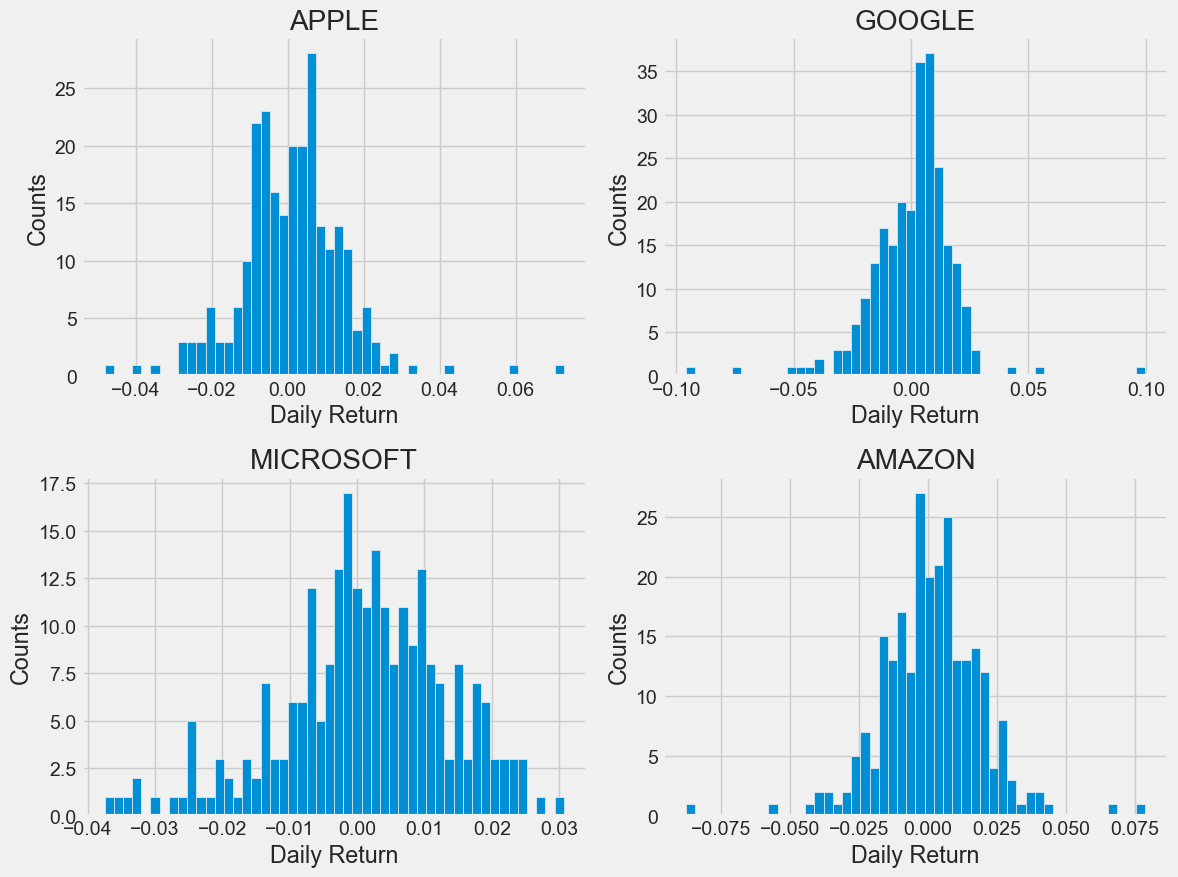

In [8]:
plt.figure(figsize=(12, 9))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}') 
plt.tight_layout()

### LSTM Prediction

In [9]:
data = yf.download("AAPL", start="2018-01-01", end=end)
df=pd.DataFrame(data)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.568913,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.561867,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.750278,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214226,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.061146,82271200
...,...,...,...,...,...,...
2024-09-05,221.630005,225.479996,221.520004,222.380005,222.380005,36615400
2024-09-06,223.949997,225.240005,219.770004,220.820007,220.820007,48423000
2024-09-09,220.820007,221.270004,216.710007,220.910004,220.910004,67180000


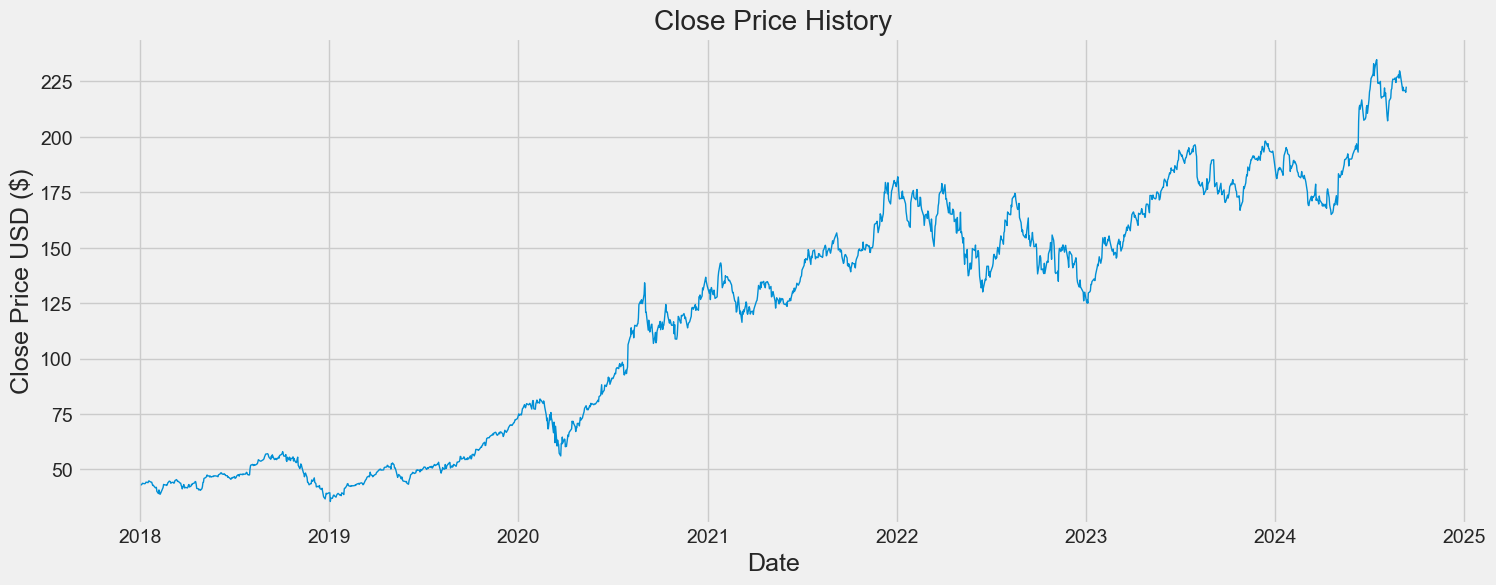

In [10]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'],linewidth=1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [11]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

1600

In [12]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
len(scaled_data)

1684

In [13]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])      #len(x_train) = len(training_data)-60
    y_train.append(train_data[i, 0])           #len(y_train) = len(training_data)-60
    if i<= 61:
        print(x_train)
        print(y_train)
        print()     
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03772471, 0.03768708, 0.03869073, 0.04116222, 0.04034676,
       0.04032167, 0.04027147, 0.0415135 , 0.04378426, 0.04265516,
       0.04630594, 0.04650666, 0.04550302, 0.04367135, 0.04372152,
       0.04018367, 0.03628197, 0.03678379, 0.03233011, 0.03108808,
       0.03166517, 0.03210427, 0.02297105, 0.01794026, 0.0261451 ,
       0.02176666, 0.01625913, 0.01783989, 0.02574365, 0.02778857,
       0.0315899 , 0.03864056, 0.03793799, 0.03721036, 0.0362318 ,
       0.03802581, 0.0417895 , 0.04614284, 0.04541519, 0.04507645,
       0.04116222, 0.04268025, 0.04344554, 0.04325734, 0.04119986,
       0.04359608, 0.04740994, 0.04959289, 0.0473974 , 0.04547792,
       0.04574137, 0.04495101, 0.0415386 , 0.04146333, 0.03648271,
       0.03344667, 0.02854132, 0.03836455, 0.03280683, 0.03047334])]
[0.03210427364000967]

[array([0.03772471, 0.03768708, 0.03869073, 0.04116222, 0.04034676,
       0.04032167, 0.04027147, 0.0415135 , 0.04378426, 0.04265516,
       0.04630594, 0.04650666, 0.04

In [86]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True,activation='relu', input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

c:\Users\Chuxu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1538/1538 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0066


In [87]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0]) 
# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print("RMSE:",rmse)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
RMSE: 5.708214905086359


C:\Users\Chuxu\AppData\Local\Temp\ipykernel_47252\1421589536.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


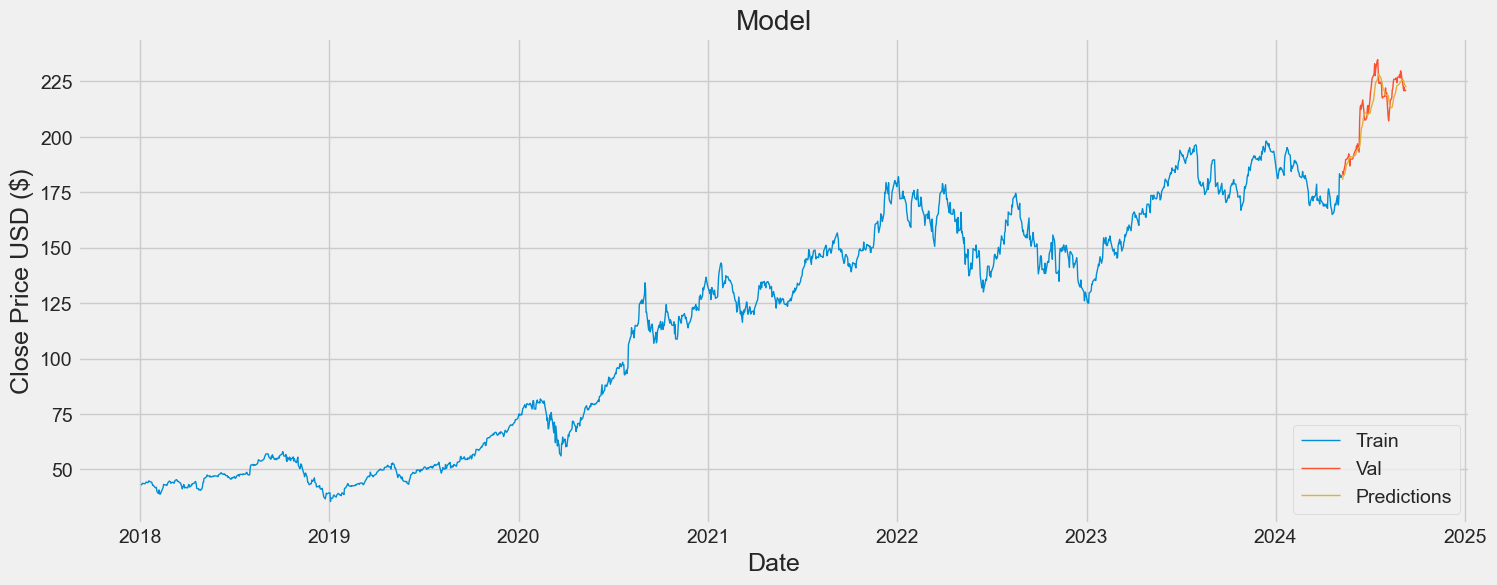

In [88]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'],linewidth=1)
plt.plot(valid[['Close', 'Predictions']],linewidth=1)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

C:\Users\Chuxu\AppData\Local\Temp\ipykernel_47252\1311896061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


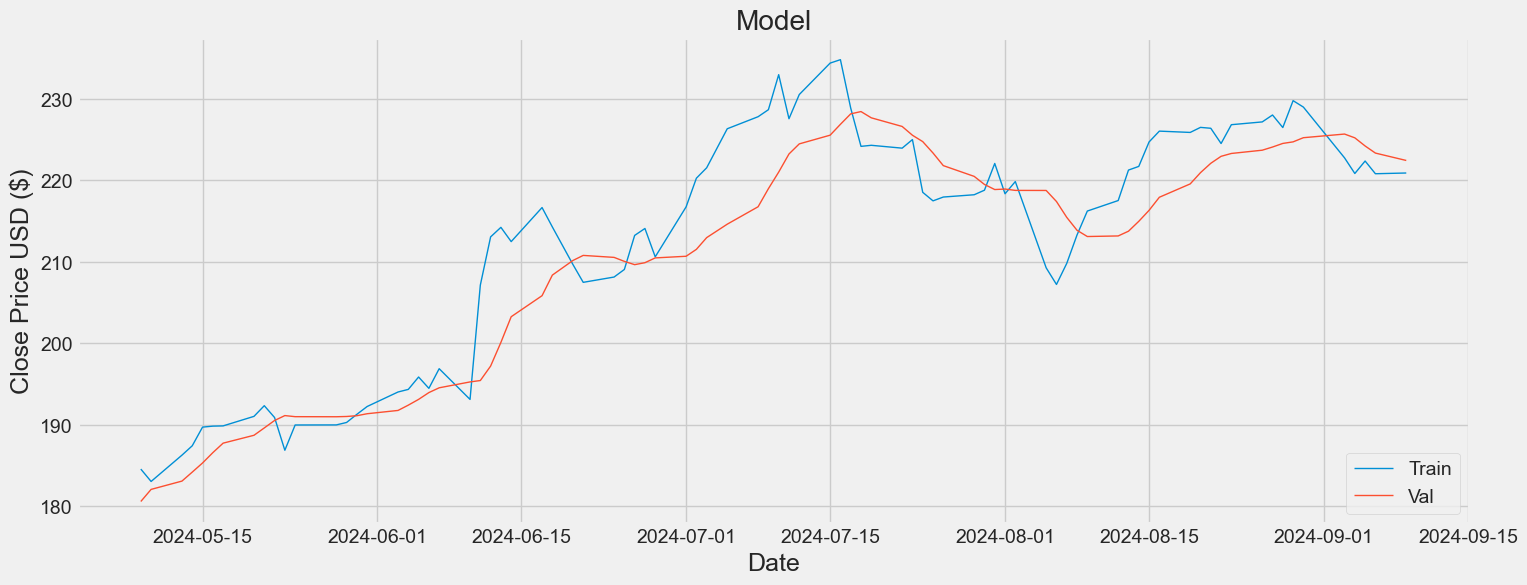

In [89]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']],linewidth=1)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()